In [13]:
import librosa

In [41]:
import librosa.display
import matplotlib.pyplot as plt
y, sr = librosa.load('/home/ms/Desktop/codit_project/00000001_normal_fan.wav')

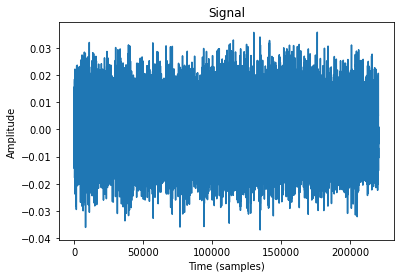

In [17]:
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

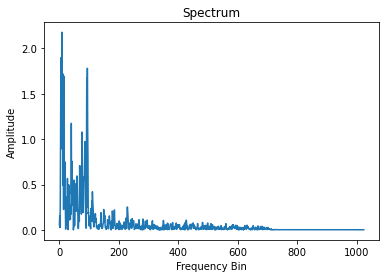

In [18]:
# FFT
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


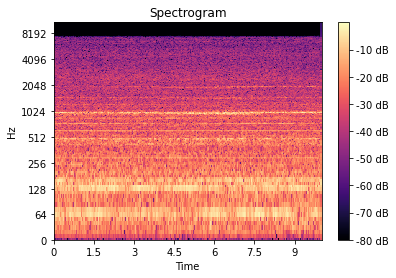

In [19]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

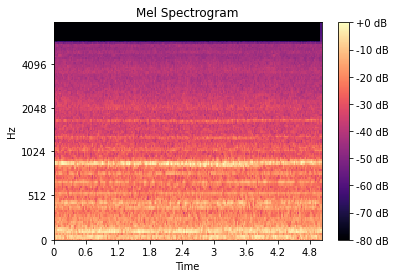

In [27]:
# Mel spectrogram

mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

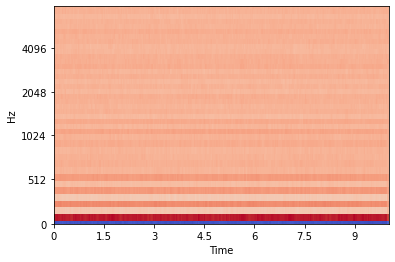

In [29]:
mel_spect = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40) # Return a two-dimensional matrix of shape=(n_mfcc, timestep)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

In [30]:
# Spectral centroid

cent = librosa.feature.spectral_centroid(y=y, sr=sr)
print(np.mean(cent.T, axis=0))

[1466.85931453]


In [34]:
S, phase = librosa.magphase(librosa.stft(y=y))

#librosa.feature.spectral_centroid(S=S)

/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


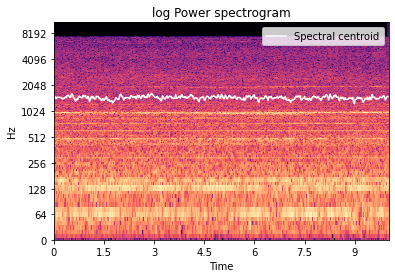

In [36]:
import matplotlib.pyplot as plt

times = librosa.times_like(cent)

fig, ax = plt.subplots()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax)

ax.plot(times, cent.T, label='Spectral centroid', color='w')

ax.legend(loc='upper right')

ax.set(title='log Power spectrogram');

/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


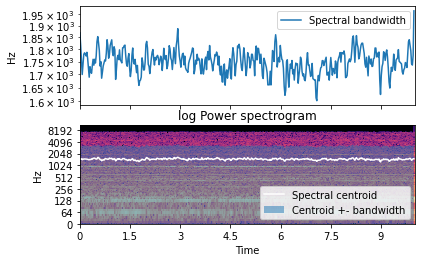

In [39]:
# Spectral bandwidth

spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

S, phase = librosa.magphase(librosa.stft(y=y))

librosa.feature.spectral_bandwidth(S=S)

freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)

librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, sharex=True)

times = librosa.times_like(spec_bw)

centroid = librosa.feature.spectral_centroid(S=S)

ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')

ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])

ax[0].legend()

ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='log Power spectrogram')

ax[1].fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],

                alpha=0.5, label='Centroid +- bandwidth')

ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')

ax[1].legend(loc='lower right');

In [49]:
# Spectral rolloff

#librosa.feature.spectral_rolloff(y=y, sr=sr)

# Approximate maximum frequencies with roll_percent=0.99

rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)

#rolloff


# Approximate minimum frequencies with roll_percent=0.01

rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)

#rolloff_min

In [48]:
S, phase = librosa.magphase(librosa.stft(y))

#librosa.feature.spectral_rolloff(S=S, sr=sr)

In [55]:
# With a higher roll percentage:

#librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.95)

/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ms/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'log Power spectrogram')]

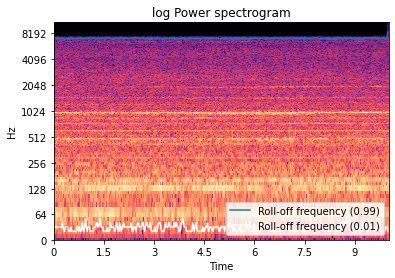

In [56]:
fig, ax = plt.subplots()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax)

ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')

ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',

        label='Roll-off frequency (0.01)')

ax.legend(loc='lower right')

ax.set(title='log Power spectrogram')

In [ ]:
# Zero crossing rate
import numpy as np
file = librosa.feature.spectral_rolloff(y)
file_mean = np.mean(file)

In [ ]:
file_mean

In [ ]:
# Subplots

import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, axs = plt.subplots(2,figsize=(8,8))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y);

In [ ]:
def get_sound_files(folder: str) -> pd.DataFrame:
    """
    Function to get all sound files within a folder.
    Param: `folder` name includes background noise level and machine type (e.g. -6_db_fan)    
    Return: a DataFrame  
    """
    # Create empty lists
    sound_list: List[str] = []  # will contain all sound filenames
    sound_path_list: List[str] = []  # will contain the sound's filepaths
    noise_db_list: List[int] = [] # will contain the background noise level in db of each sound
    machine_type_list: List[str] = [] # will contain the machine type of each sound
    model_id_list: List[str] = []  # will contain the machine product id of each sound
    target_list: List[str] = [] # will contain the target value (normal=0 or anormal=1) for each sound

    # Get the relative path of the directory that contains all the sound files
    folder_path = os.path.join("assets", "sounds", folder)

    # Get all the filenames within the directory
    for path, dirs, files in os.walk(folder_path):
        for filename in files:
            # Search only filenames with the extension ".wav"
            if filename.lower().endswith(".wav"):

                # Get the filename
                sound_list.append(filename)

                # Get the filepath
                sound_path = os.path.join(path, filename)
                sound_path_list.append(sound_path)
                
                # Split filepath to retrieve the information
                path_splitted = sound_path.split("/")
                
                # Get the background noise in db
                noise_db = int(path_splitted[2].split("_")[0])
                noise_db_list.append(noise_db)
                
                # Get the machine type
                machine_type = path_splitted[2].split("_")[2]
                machine_type_list.append(machine_type)
                
                # Get the model id
                model_id = path_splitted[3].split("_")[1]
                model_id_list.append(model_id)
                
                # Get target variable (normal or anormal)
                target = path_splitted[4]
                target_list.append(target)

    # Create a DataFrame from the lists
    return pd.DataFrame(list(zip(noise_db_list, machine_type_list, model_id_list, sound_list, sound_path_list, target_list)), 
                        columns=["noise_db", "machine_type", "model_id", "sound", "sound_path", "target"])

def get_all_sounds(db_list: List[int], machine_type_list: List[str]) -> pd.DataFrame:
    """
    Function to get all sound files for specified lists of background noise and machine type.
    Param: * `db_list` is a list of background noise level (i.e. -6, 0, 6)
           * `machine_type_list` is a list of machine type (i.e. fan, pump, valve, slider) 
    Return: a DataFrame  
    """
    df_list = []
    for db in db_list:
        for machine_type in machine_type_list:
            df = get_sound_files(f"{db}_db_{machine_type}")
            df_list.append(df)
            
    return pd.concat(df_list, axis=0)